In [1]:
# author     : Enes Çavuş
# date       : July 2021
# subject    : Data Preprocessing and Applying Decision Tree Machine Lerning Algorithms

---

    - This code mainly aiming to understand preprocessing 
    - Discovering the data and handling with missing data
    - Understanding of data types and type conversions
    - Making an easy and understandable machine learning model
    - Seeing how decison tree works

---


In [2]:
# common libnraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# ml preprocessing and model building modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report

In [4]:
# loading data - readable and easy to manipulate
# renaming - preprocessing
df = pd.read_csv("datasets/processed.switzerland.data",
                 sep=',',
                 header=None,
                 names = ['age','sex','chestpain','bps','cholestrol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','prediction']
                ) # header yok, sutun ismini ben verecegim
# detail infor about the dataset
# https://archive.ics.uci.edu/ml/datasets/heart+disease
df.head()

,age,sex,chestpain,bps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prediction
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [5]:
cols = df.columns
for col in cols:
    print(df[col].unique())
    # no categorical value 

[32 34 35 36 38 40 41 42 43 45 46 47 48 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 72 73 74]
[1 0]
[1 4 3 2]
['95' '115' '?' '110' '105' '100' '135' '150' '125' '145' '140' '155'
 '160' '120' '130' '165' '80' '180' '170' '200' '185']
[0]
['?' '0' '1']
['0' '?' '1' '2']
['127' '154' '130' '125' '166' '156' '179' '128' '150' '120' '144' '176'
 '99' '122' '145' '140' '138' '133' '113' '118' '149' '124' '110' '139'
 '92' '104' '170' '163' '60' '126' '82' '95' '115' '135' '141' '155' '83'
 '97' '98' '100' '148' '103' '121' '131' '182' '105' '175' '94' '119'
 '143' '63' '70' '77' '117' '123' '134' '72' '78' '109' '86' '114' '93'
 '67' '90' '108' '136' '?' '157']
['0' '1' '?']
['.7' '.2' '?' '1' '2.8' '0' '-1.1' '1.6' '-1.5' '1.5' '2' '.5' '-.1'
 '-2.6' '2.1' '-.7' '2.2' '3' '.1' '.3' '-2' '-1' '1.8' '1.4' '2.6' '.9'
 '2.4' '1.1' '.4' '2.5' '1.7' '-.8' '-.5' '-.9' '3.7' '1.3']
['1' '?' '2' '3']
['?' '1' '2']
['?' '7' '6' '3']
[1 3 2 0 4]


## Missing data operations

In [6]:
# bazi veriler numeric olmasına ragmen object type olarak gozukuyor, bunun bir sebebi olabilir, örneğin 
# içerisinde 'boş' bırakılan veriler categorical bir değer ile doldurulmuştur 
# ya da gelişigüzel olarak belirtilmiş olabilir
# detaylı incelenmeli

# eger numeric olup object olan veriler varsa bunları numerice cevirince string değerler NaN olacaktır

In [7]:
# UCI sitesindeki veriseti bilgilerine dayanarak kategorik olan sutunları float'a cevirebilirz.
df.select_dtypes(include=['object',"category"]).columns

Index(['bps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal'],
      dtype='object')

In [8]:
for column in df.select_dtypes(include=['object',"category"]).columns:
    df[column] = pd.to_numeric(df[column],errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         123 non-null    int64  
 1   sex         123 non-null    int64  
 2   chestpain   123 non-null    int64  
 3   bps         121 non-null    float64
 4   cholestrol  123 non-null    int64  
 5   fbs         48 non-null     float64
 6   restecg     122 non-null    float64
 7   thalach     122 non-null    float64
 8   exang       122 non-null    float64
 9   oldpeak     117 non-null    float64
 10  slope       106 non-null    float64
 11  ca          5 non-null      float64
 12  thal        71 non-null     float64
 13  prediction  123 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 13.6 KB


In [9]:
print(df.isnull().sum()) 
df.info() # gorunuste missing data yok fakat tabloda gorunene gore bazi verilerde ? işaretleri var

age             0
sex             0
chestpain       0
bps             2
cholestrol      0
fbs            75
restecg         1
thalach         1
exang           1
oldpeak         6
slope          17
ca            118
thal           52
prediction      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         123 non-null    int64  
 1   sex         123 non-null    int64  
 2   chestpain   123 non-null    int64  
 3   bps         121 non-null    float64
 4   cholestrol  123 non-null    int64  
 5   fbs         48 non-null     float64
 6   restecg     122 non-null    float64
 7   thalach     122 non-null    float64
 8   exang       122 non-null    float64
 9   oldpeak     117 non-null    float64
 10  slope       106 non-null    float64
 11  ca          5 non-null      float64
 12  thal        71 non-null     float64
 13  prediction

In [10]:
#df.isin(['?']).sum() # veri setinde bunlardan biri var mı? ['?', None, '-']
# birçok veride soru işareti var yani kayıp veri

In [11]:
#df.isin(['?']).sum()

In [12]:
df.head()

,age,sex,chestpain,bps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prediction
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2


In [13]:
# bazi sutunlarda cok fazla bos veri var bunlari tek tek incelemeli
print("fbs  : ",df["fbs"].unique())
print("ca   : ",df["ca"].unique())
print("thal : ",df["thal"].unique())
print("slope: ",df["slope"].unique())

fbs  :  [nan  0.  1.]
ca   :  [nan  1.  2.]
thal :  [nan  7.  6.  3.]
slope:  [ 1. nan  2.  3.]


In [14]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,percent_missing
ca,95.934959
fbs,60.975610
thal,42.276423
slope,13.821138
oldpeak,4.878049
bps,1.626016
restecg,0.813008
thalach,0.813008
exang,0.813008
age,0.000000


In [15]:
# drop - ca, fbs, thal
df.drop(columns=["ca","fbs","thal"], inplace=True)

<AxesSubplot:>

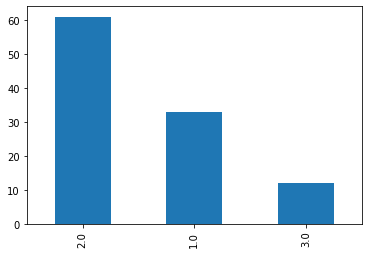

In [16]:
# slope incelemesi
#slope: the slope of the peak exercise ST segment
#-- Value 1: upsloping
#-- Value 2: flat
#-- Value 3: downsloping
df["slope"].value_counts().plot.bar()

In [17]:
# checking correlations
corr = df.corr()
print(corr["slope"].sort_values())
print()

thalach      -0.155537
bps          -0.140378
restecg      -0.083021
oldpeak      -0.044153
prediction   -0.040994
sex          -0.023671
chestpain     0.064606
age           0.090648
exang         0.193089
slope         1.000000
cholestrol         NaN
Name: slope, dtype: float64



<AxesSubplot:>

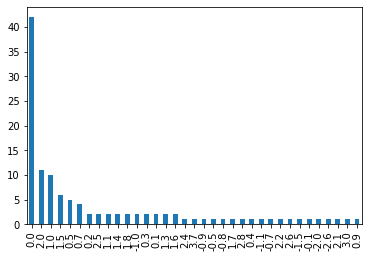

In [18]:
df["oldpeak"].value_counts().plot.bar()

In [19]:
# categorical kayıp veriler en yaygın olanlar ile degistirildi.
def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col
df_no_missing = df.copy()
df_no_missing.apply(lambda col:fillna(col))

,age,sex,chestpain,bps,cholestrol,restecg,thalach,exang,oldpeak,slope,prediction
0,32,1,1,95.0,0,0.0,127.0,0.0,0.7,1.0,1
1,34,1,4,115.0,0,0.0,154.0,0.0,0.2,1.0,1
2,35,1,4,115.0,0,0.0,130.0,1.0,0.0,2.0,3
3,36,1,4,110.0,0,0.0,125.0,1.0,1.0,2.0,1
4,38,0,4,105.0,0,0.0,166.0,0.0,2.8,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.0,0,1.0,92.0,1.0,0.0,2.0,1
119,70,1,4,140.0,0,0.0,157.0,1.0,2.0,2.0,3
120,72,1,3,160.0,0,2.0,114.0,0.0,1.6,2.0,0
121,73,0,3,160.0,0,1.0,121.0,0.0,0.0,1.0,1


In [20]:
df_no_missing.isna().sum().sum()

0

# Machine Learning Operations

In [21]:
X = df_no_missing.drop(columns="prediction",axis=1).copy()
y = df["prediction"].copy()

In [22]:
y.unique() # need to convert 0 - 1 pairs  to make this process easier
# if someone is greter then 0, they willl. pretend like they have heart disease

array([1, 3, 2, 0, 4])

In [23]:
y_zero_one = y > 0
y[y_zero_one] = 1
y.unique()

array([1, 0])

In [24]:
# data scaling and encoding - getting ready to train
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
LEncoder = LabelEncoder()

X_scaled = scaler.fit_transform(X)
y = LEncoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)


In [25]:
# model training adn predictions - checking the result out
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy : " , accuracy_score(y_test, y_pred))
# print prediction results
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

Accuracy :  0.88
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.92      0.96      0.94        23

    accuracy                           0.88        25
   macro avg       0.46      0.48      0.47        25
weighted avg       0.84      0.88      0.86        25



[Text(558.0, 733.86, 'chestpain <= -0.29\ngini = 0.115\nsamples = 98\nvalue = [6, 92]\nclass = No'),
 Text(343.38461538461536, 570.78, 'slope <= -0.567\ngini = 0.375\nsamples = 20\nvalue = [5, 15]\nclass = No'),
 Text(171.69230769230768, 407.70000000000005, 'thalach <= 0.348\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = Yes'),
 Text(85.84615384615384, 244.62, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = No'),
 Text(257.53846153846155, 244.62, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Yes'),
 Text(515.0769230769231, 407.70000000000005, 'slope <= 1.156\ngini = 0.231\nsamples = 15\nvalue = [2, 13]\nclass = No'),
 Text(429.23076923076917, 244.62, 'age <= 1.577\ngini = 0.133\nsamples = 14\nvalue = [1, 13]\nclass = No'),
 Text(343.38461538461536, 81.54000000000008, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = No'),
 Text(515.0769230769231, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(600.9230769230769, 244.62, 'gini = 0.0\nsamples

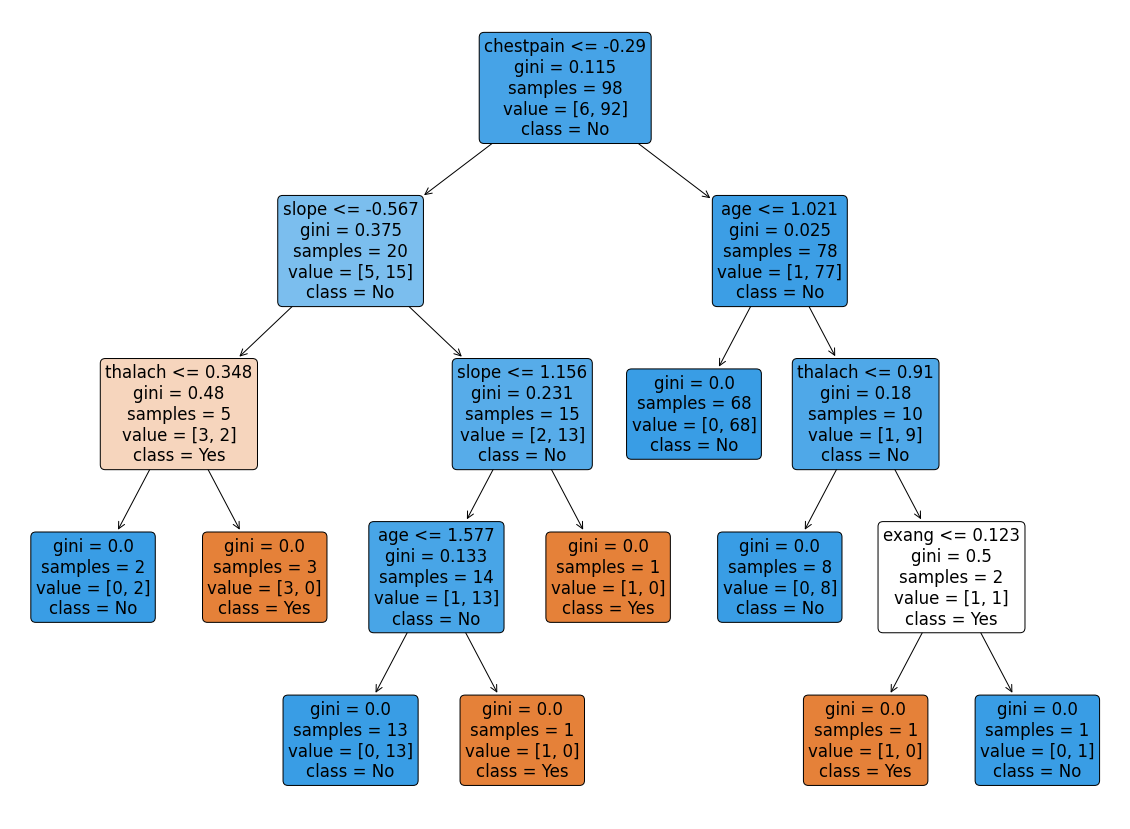

In [26]:
# to make this output clear and to understand decision tree's mechanism behind
plt.figure(figsize=(20,15))
plot_tree(clf,filled=True,
         rounded=True,
         class_names=["Yes", "No"],
         feature_names=X.columns
         )

___ENES ÇAVUŞ - Decision Tree and EDA practices___